In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the datasets
healthcare_data = pd.read_csv(r'C:\Users\varsh\Downloads\ehealth-kenya-facilities - ehealth-kenya-facilities.csv')
population_data = pd.read_csv(r'C:\Users\varsh\Downloads\distribution-of-population-by-sex-and-sub-county - distribution-of-population-by-sex-and-sub-county.csv')

In [3]:
# Inspect the first few rows of the healthcare data
healthcare_data.head()

,Facility Code,Facility Name,Province,County,District,Division,Type,Owner,Location,Sub Location,...,IPD,OPD,OUTREACH,PMTCT,RAD/XRAY,RHTC/RHDC,TB DIAG,TB LABS,TB TREAT,YOUTH
0,19224,CDF Kiriari Dispensary,Eastern,Embu,Manyatta,Manyatta,Dispensary,Ministry of Health,Ruguru,Ruguru,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19310,St Jude's Huruma Community Health Services,Nairobi,Nairobi,Mathare,Huruma,Medical Clinic,Private Practice - Unspecified,Huruma,Huruma,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14180,10 Engineer VCT,Rift Valley,Laikipia,Laikipia East,Central,Dispensary,Armed Forces,Nanyuki,Majengo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17486,12 Engineers,Central,Kiambu,Thika West,NaN,Dispensary,Ministry of Health,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18393,3Kl Maternity & Nursing Home,Rift Valley,Kajiado,Kajiado North,Ongata Rongai,Nursing Home,Private Practice - Clinical Officer,Gataka,Gataka,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
population_data.head()

,National/ County,Male,Female,Intersex,Total
0,Kenya,23548056,24014716,1524,47564296
1,Mombasa,610257,598046,30,1208333
2,Changamwe,68761,63121,..,131882
3,Jomvu,83002,80410,3,163415
4,Kisauni,146748,145176,6,291930


In [5]:
# Check the structure of the healthcare dataset
healthcare_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10505 entries, 0 to 10504
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Facility Code            10505 non-null  int64  
 1   Facility Name            10505 non-null  object 
 2   Province                 10505 non-null  object 
 3   County                   10505 non-null  object 
 4   District                 10505 non-null  object 
 5   Division                 10238 non-null  object 
 6   Type                     10505 non-null  object 
 7   Owner                    10505 non-null  object 
 8   Location                 10010 non-null  object 
 9   Sub Location             9612 non-null   object 
 10  Description of Location  5304 non-null   object 
 11  Constituency             10505 non-null  object 
 12  Nearest Town             9903 non-null   object 
 13  Beds                     10418 non-null  float64
 14  Cots                  

In [6]:
population_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   National/ County  393 non-null    object
 1   Male              393 non-null    int64 
 2   Female            393 non-null    int64 
 3   Intersex          393 non-null    object
 4   Total             393 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 15.5+ KB


In [7]:
# Check for percentage of missing values
healthcare_data.isnull().sum()*100/len(healthcare_data)

Facility Code                0.000000
Facility Name                0.000000
Province                     0.000000
County                       0.000000
District                     0.000000
Division                     2.541647
Type                         0.000000
Owner                        0.000000
Location                     4.712042
Sub Location                 8.500714
Description of Location     49.509757
Constituency                 0.000000
Nearest Town                 5.730604
Beds                         0.828177
Cots                         0.732984
Official Landline           87.025226
Official Fax                94.869110
Official Mobile             72.270347
Official Email              82.332223
Official Address            33.717277
Official Alternate No       90.937649
Town                        25.387911
Post Code                   36.411233
In Charge                   20.390290
Job Title of in Charge      29.500238
Open 24 Hours                4.255117
Open Weekend

In [8]:
# Impute numerical columns with the median
healthcare_data['Beds'].fillna(healthcare_data['Beds'].median(), inplace=True)
healthcare_data['Cots'].fillna(healthcare_data['Cots'].median(), inplace=True)

In [9]:
# Drop columns where all values are missing
healthcare_data.dropna(axis=1, how='all',inplace=True)

In [10]:
healthcare_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10505 entries, 0 to 10504
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Facility Code            10505 non-null  int64  
 1   Facility Name            10505 non-null  object 
 2   Province                 10505 non-null  object 
 3   County                   10505 non-null  object 
 4   District                 10505 non-null  object 
 5   Division                 10238 non-null  object 
 6   Type                     10505 non-null  object 
 7   Owner                    10505 non-null  object 
 8   Location                 10010 non-null  object 
 9   Sub Location             9612 non-null   object 
 10  Description of Location  5304 non-null   object 
 11  Constituency             10505 non-null  object 
 12  Nearest Town             9903 non-null   object 
 13  Beds                     10505 non-null  float64
 14  Cots                  

In [11]:
# Convert categorical variables to category type
categorical_columns = ['Owner', 'Type', 'Operational Status']
for col in categorical_columns:
    healthcare_data[col] = healthcare_data[col].astype('category')

In [12]:
# Convert 'Open 24 Hours' and 'Open Weekends' to boolean
healthcare_data['Open 24 Hours'] = healthcare_data['Open 24 Hours'].map({'Yes': True, 'No': False})
healthcare_data['Open Weekends'] = healthcare_data['Open Weekends'].map({'Yes': True, 'No': False})

# Check data types
print(healthcare_data.dtypes)

Facility Code                 int64
Facility Name                object
Province                     object
County                       object
District                     object
Division                     object
Type                       category
Owner                      category
Location                     object
Sub Location                 object
Description of Location      object
Constituency                 object
Nearest Town                 object
Beds                        float64
Cots                        float64
Official Landline            object
Official Fax                 object
Official Mobile              object
Official Email               object
Official Address             object
Official Alternate No       float64
Town                         object
Post Code                    object
In Charge                    object
Job Title of in Charge       object
Open 24 Hours                object
Open Weekends                object
Operational Status         c

In [13]:
# Summary statistics for numerical features
summary_stats = healthcare_data.describe()
print(summary_stats)

       Facility Code          Beds          Cots  Official Alternate No
count   10505.000000  10505.000000  10505.000000           9.520000e+02
mean    15726.711471      5.387911      0.738886           6.695277e+08
std      3246.324955     29.742805     11.290590           5.568178e+08
min     10001.000000      0.000000      0.000000           0.000000e+00
25%     12957.000000      0.000000      0.000000           7.138962e+08
50%     15702.000000      0.000000      0.000000           7.227692e+08
75%     18569.000000      1.000000      0.000000           7.278981e+08
max     21281.000000   1455.000000   1000.000000           7.382217e+09


In [14]:
# Count operational vs non-operational facilities
operational_count = healthcare_data['Operational Status'].value_counts()
print(operational_count)

Operational Status
Operational        9551
Not-Operational     529
Pending Opening     401
Unknown              24
Name: count, dtype: int64


C:\Users\varsh\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


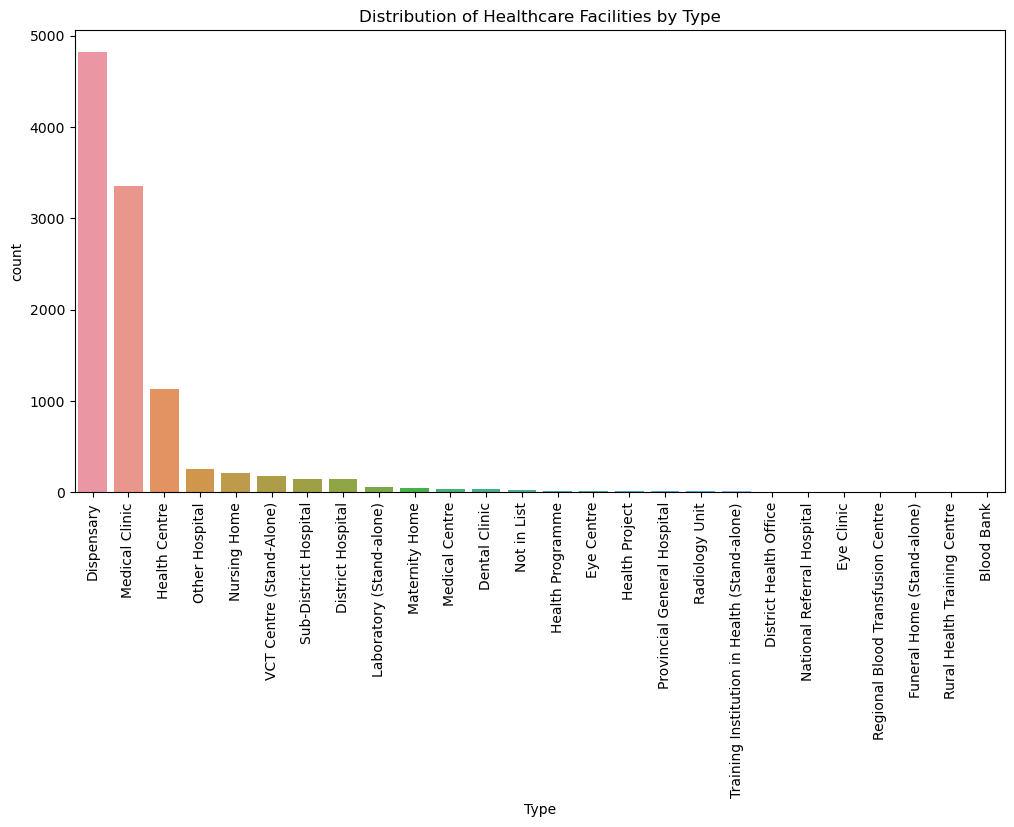

C:\Users\varsh\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


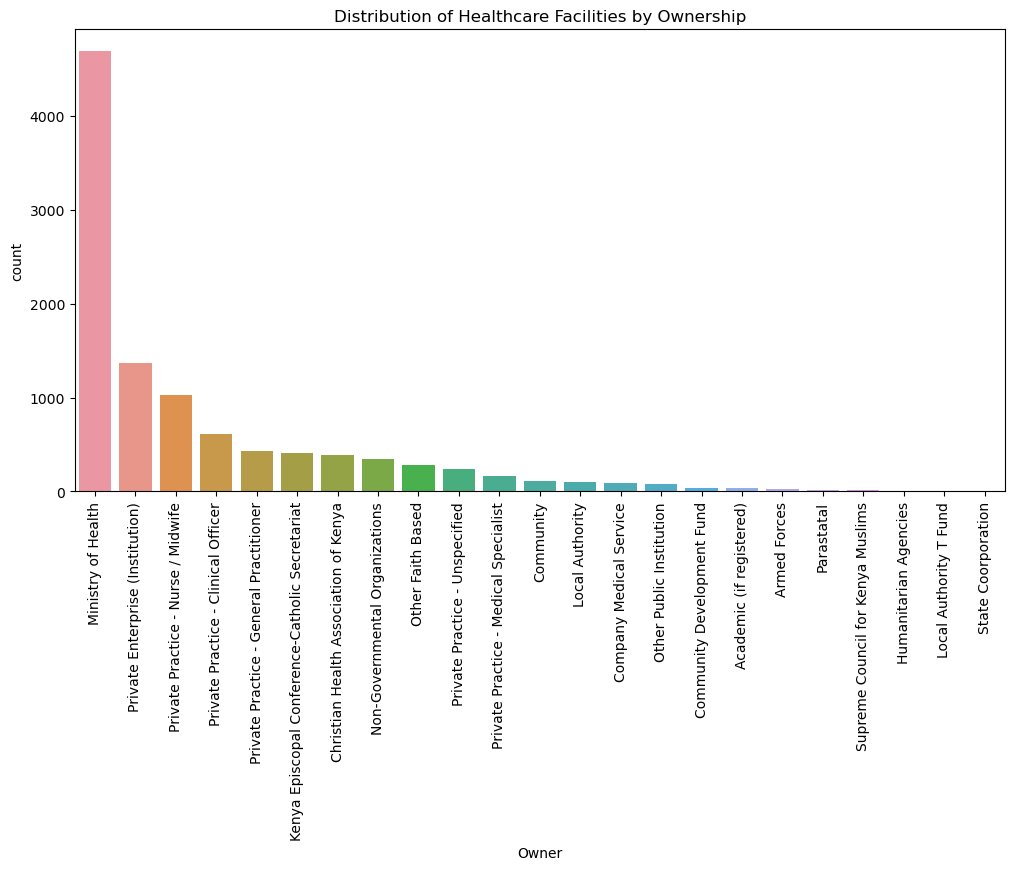

In [15]:
# Bar plot for type of facilities
plt.figure(figsize=(12, 6))
sns.countplot(data=healthcare_data, x='Type', order=healthcare_data['Type'].value_counts().index)
plt.title('Distribution of Healthcare Facilities by Type')
plt.xticks(rotation=90)
plt.show()

# Bar plot for ownership
plt.figure(figsize=(12, 6))
sns.countplot(data=healthcare_data, x='Owner', order=healthcare_data['Owner'].value_counts().index)
plt.title('Distribution of Healthcare Facilities by Ownership')
plt.xticks(rotation=90)
plt.show()

C:\Users\varsh\AppData\Local\Temp\ipykernel_26696\4132524061.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  facility_counts = nairobi_data.groupby(['Province', 'Operational Status']).size().unstack(fill_value=0)


<Figure size 1400x800 with 0 Axes>

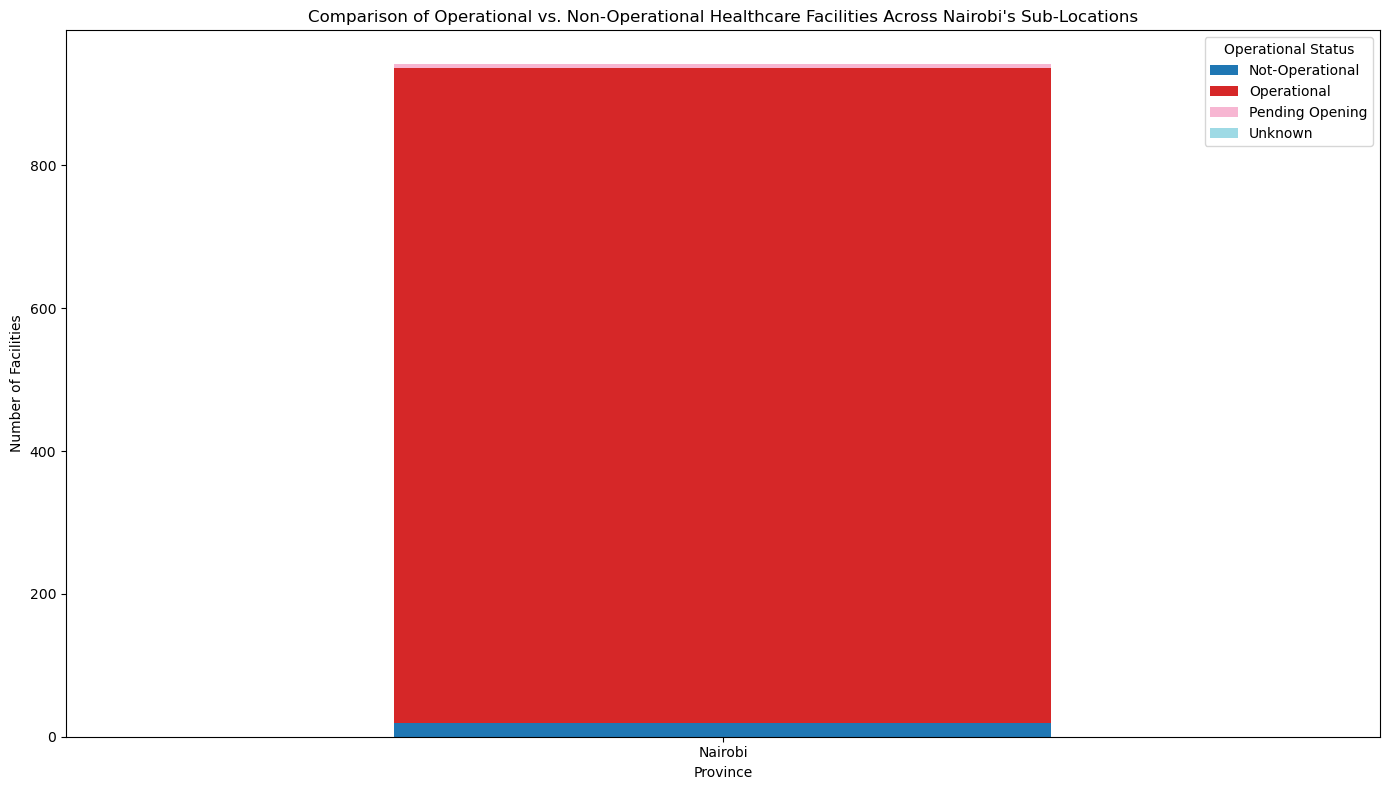

In [16]:
# Filter the data for Nairobi County
nairobi_data = healthcare_data[healthcare_data['County'] == 'Nairobi']

# Count the number of operational and non-operational facilities by sub-location
facility_counts = nairobi_data.groupby(['Province', 'Operational Status']).size().unstack(fill_value=0)

# Plot the comparison
plt.figure(figsize=(14, 8))
facility_counts.plot(kind='bar', stacked=True, colormap='tab20', figsize=(14, 8))
plt.title('Comparison of Operational vs. Non-Operational Healthcare Facilities Across Nairobi\'s Sub-Locations')
plt.xlabel('Province')
plt.ylabel('Number of Facilities')
plt.legend(title='Operational Status')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

In [17]:
healthcare_data['Type'].unique()

['Dispensary', 'Medical Clinic', 'Nursing Home', 'Health Centre', 'Dental Clinic', ..., 'National Referral Hospital', 'District Health Office', 'Funeral Home (Stand-alone)', 'Rural Health Training Centre', 'Blood Bank']
Length: 26
Categories (26, object): ['Blood Bank', 'Dental Clinic', 'Dispensary', 'District Health Office', ..., 'Rural Health Training Centre', 'Sub-District Hospital', 'Training Institution in Health (Stand-alone)', 'VCT Centre (Stand-Alone)']

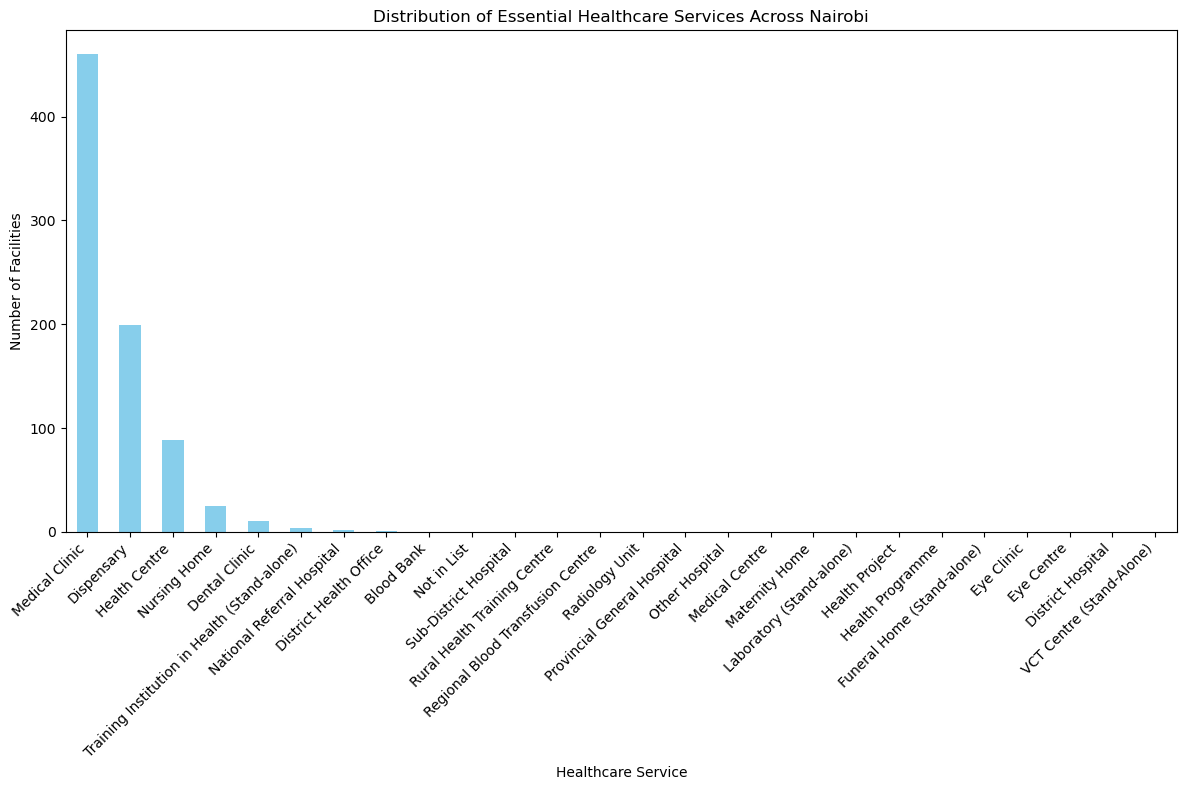

In [18]:
# Filter the data for Nairobi County
nairobi_data = healthcare_data[healthcare_data['County'] == 'Nairobi']

# Define essential healthcare services (adjust based on your specific needs)
# Here, we'll use the types you've listed; modify according to what's considered essential
essential_services = [
    'Blood Bank', 'Dental Clinic', 'Dispensary', 'Medical Clinic', 'Nursing Home',
    'Health Centre', 'National Referral Hospital', 'District Health Office',
    'Rural Health Training Centre', 'Funeral Home (Stand-alone)', 'Training Institution in Health (Stand-alone)'
]

# Filter the data to include only rows where the Type column is in the list of essential services
essential_services_data = nairobi_data[nairobi_data['Type'].isin(essential_services)]

# Count the number of facilities providing each type of essential healthcare service
service_distribution = essential_services_data['Type'].value_counts()

# Plot the distribution
plt.figure(figsize=(12, 8))
service_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Essential Healthcare Services Across Nairobi')
plt.xlabel('Healthcare Service')
plt.ylabel('Number of Facilities')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

In [19]:
non_operational_counts = healthcare_data[healthcare_data['Operational Status'] == 'Not-Operational'] \
                         .groupby('County').size()

# Sort the counties by the number of non-operational facilities in descending order
sorted_non_operational_counts = non_operational_counts.sort_values(ascending=False)

# Display the results
sorted_non_operational_counts

County
Machakos           45
Kitui              30
Murang'a           30
Nandi              29
Makueni            26
Wajir              23
Nyeri              23
Nakuru             23
Kirinyaga          22
Baringo            20
Nairobi            19
Turkana            15
Kilifi             14
Uasin Gishu        12
Migori             12
West Pokot         12
Bungoma            12
Mandera            11
Narok              11
Kiambu             11
Kakamega           11
Samburu            10
Meru                9
Garissa             9
Kericho             8
Homa Bay            8
Marsabit            7
Kajiado             7
Elgeyo Marakwet     7
Bomet               6
Tana River          5
Mombasa             4
Kisii               4
Taita Taveta        4
Siaya               3
Vihiga              3
Busia               3
Embu                3
Lamu                3
Kisumu              3
Laikipia            2
Tharaka Nithi       2
Nyamira             2
Isiolo              2
Kwale               2
Nya

In [20]:
owner_mapping = {
    'Ministry of Health': 'Ministry of Health',
    'Local Authority T Fund': 'Ministry of Health',
    'State Coorporation': 'Ministry of Health',
    'Parastatal': 'Ministry of Health',
    'Academic (if registered)': 'Other',
    'Armed Forces': 'Ministry of Health',
    'Christian Health Association of Kenya': 'NGOs',
    'Community Development Fund': 'Community',
    'Humanitarian Agencies': 'NGOs',
    'Private Practice - Unspecified': 'Private',
    'Private Practice - Clinical Officer': 'Private',
    'Private Enterprise (Institution)': 'Private',
    'Private Practice - Nurse / Midwife': 'Private',
    'Supreme Council for Kenya Muslims': 'NGOs',
    'Private Practice - Doctor': 'Private',
    'Private Hospital': 'Private',
    'NGO Health Service': 'NGOs',
    'Community': 'Community',
    'Christian Health Association': 'NGOs',
    'Other': 'Other',  # Catch-all for any other categories
}

In [21]:
# Create a function to map the Owner column to broader categories
def categorize_owner(owner):
    for key in owner_mapping:
        if key in owner:
            return owner_mapping[key]
    return 'Other'  # Default category for unmapped owners

# Apply the categorization
healthcare_data['Owner_Category'] = healthcare_data['Owner'].apply(categorize_owner)

# Filter for operational facilities
operational_facilities = healthcare_data[healthcare_data['Operational Status'] == 'Operational']

# Count the number of operational facilities by Owner_Category
operational_facilities_counts = operational_facilities.groupby('Owner_Category').size()

# Sort the categories by the number of operational facilities in descending order
sorted_operational_facilities_counts = operational_facilities_counts.sort_values(ascending=False)

# Display the results
print(sorted_operational_facilities_counts)

Owner_Category
Ministry of Health    4188
Private               3014
Other                 1867
NGOs                   381
Community              101
dtype: int64


In [22]:
# Define essential healthcare services
essential_services = ['Maternity Home', 'Blood Bank']  # Update with actual names used in your dataset

# Filter for essential services
essential_services_data = healthcare_data[healthcare_data['Type'].isin(essential_services)]

# Count the number of facilities providing each essential service by province
service_counts_by_province = essential_services_data.groupby('Province')['Type'].value_counts().unstack(fill_value=0)

# Check regions where essential services are lacking
# This will give you a matrix of services by province
print(service_counts_by_province)

# Identify provinces where any of the essential services are missing
# For example, if 'Maternity' service count is 0 in any province
missing_services_provinces = service_counts_by_province[service_counts_by_province['Maternity Home'] == 0]

# Display the results
print("Provinces lacking maternity services:")
missing_services_provinces

# Similarly, identify provinces lacking blood tests
missing_services_provinces_blood_tests = service_counts_by_province[service_counts_by_province['Blood Bank'] == 0]

# Display the results
print("Provinces lacking blood test services:")
missing_services_provinces_blood_tests

Type         Blood Bank  Dental Clinic  Dispensary  District Health Office  \
Province                                                                     
Central               0              0           0                       0   
Coast                 0              0           0                       0   
Eastern               0              0           0                       0   
Nairobi               0              0           0                       0   
Nyanza                0              0           0                       0   
Rift Valley           1              0           0                       0   
Western               0              0           0                       0   

Type         District Hospital  Eye Centre  Eye Clinic  \
Province                                                 
Central                      0           0           0   
Coast                        0           0           0   
Eastern                      0           0           0   
Nairobi

Type,Blood Bank,Dental Clinic,Dispensary,District Health Office,District Hospital,Eye Centre,Eye Clinic,Funeral Home (Stand-alone),Health Centre,Health Programme,...,Not in List,Nursing Home,Other Hospital,Provincial General Hospital,Radiology Unit,Regional Blood Transfusion Centre,Rural Health Training Centre,Sub-District Hospital,Training Institution in Health (Stand-alone),VCT Centre (Stand-Alone)
Province,,,,,,,,,,,,,,,,,,,,,
Central,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Coast,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Eastern,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Nairobi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Nyanza,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Western,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Figure size 1400x800 with 0 Axes>

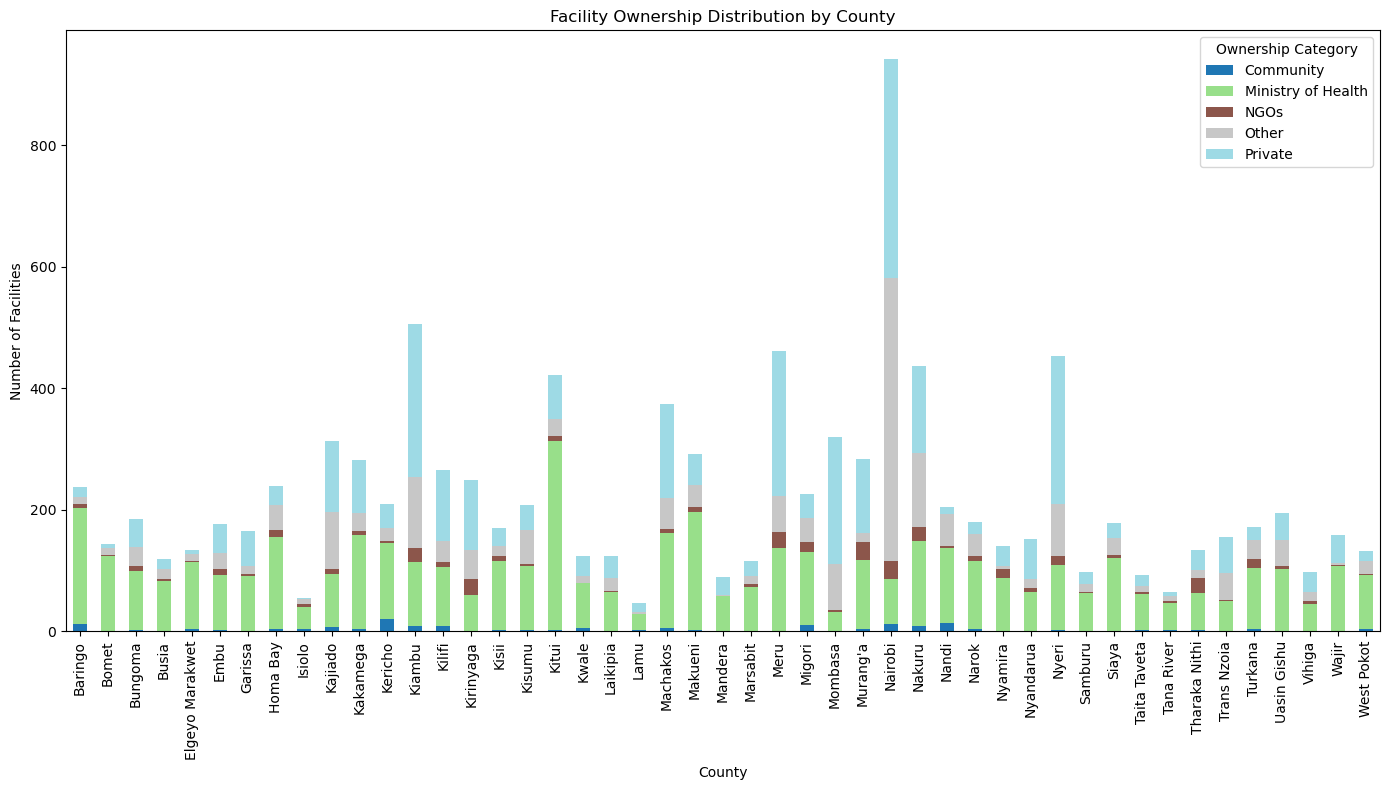

In [23]:
# Define the mapping (use the mapping you created based on your data)
def categorize_owner(owner):
    for key in owner_mapping:
        if key in owner:
            return owner_mapping[key]
    return 'Other'  # Default category for unmapped owners

# Apply the categorization
healthcare_data['Owner_Category'] = healthcare_data['Owner'].apply(categorize_owner)

# Count the number of facilities by County and ownership category
ownership_distribution = healthcare_data.groupby(['County', 'Owner_Category']).size().unstack(fill_value=0)

# Plot the bar chart
plt.figure(figsize=(14, 8))
ownership_distribution.plot(kind='bar', stacked=True, colormap='tab20', figsize=(14, 8))
plt.title('Facility Ownership Distribution by County')
plt.xlabel('County')
plt.ylabel('Number of Facilities')
plt.legend(title='Ownership Category')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

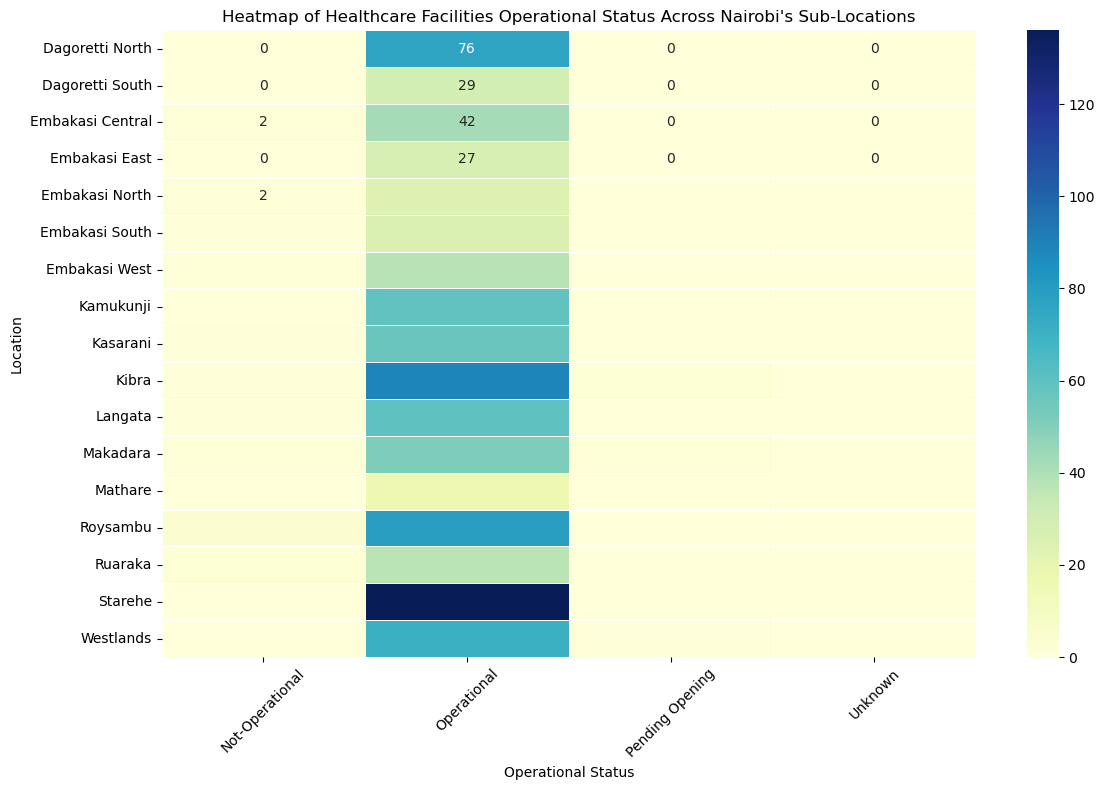

In [24]:
nairobi_data = healthcare_data[healthcare_data['Province'] == 'Nairobi']

# Create a pivot table to count operational and non-operational facilities by sub-location
pivot_table = pd.pivot_table(
    nairobi_data,
    values='Owner',  # Or any column that is always present
    index='District',  
    columns='Operational Status',
    aggfunc='count',  # Count the number of facilities
    fill_value=0  # Fill missing values with 0
)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5)
plt.title('Heatmap of Healthcare Facilities Operational Status Across Nairobi\'s Sub-Locations')
plt.xlabel('Operational Status')
plt.ylabel('Location')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

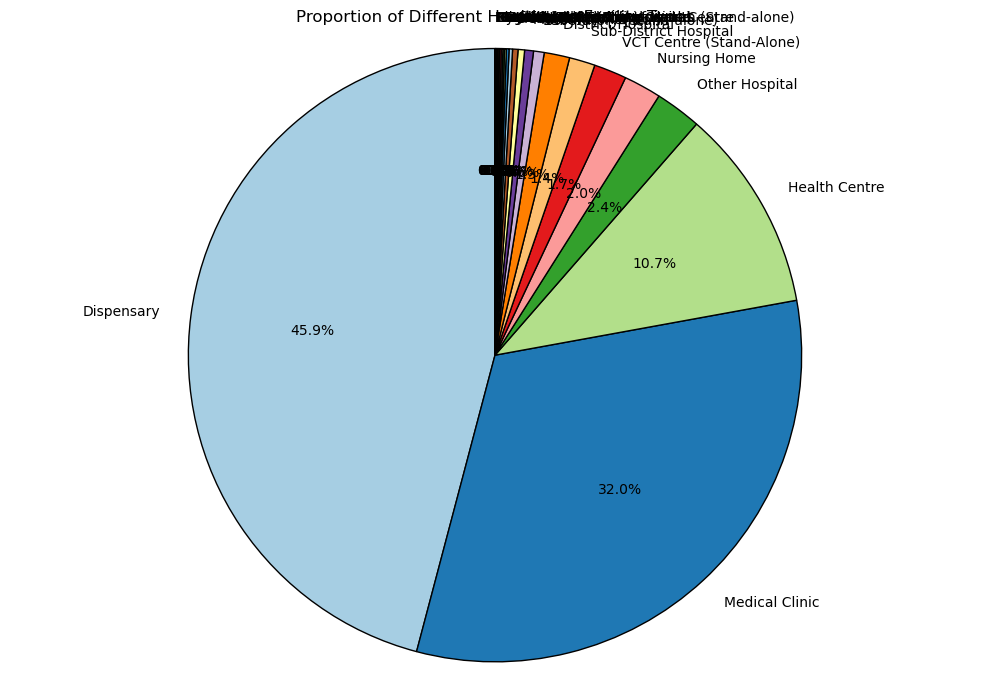

In [25]:
# Count the number of each healthcare facility type in the 'Type' column
facility_type_distribution = healthcare_data['Type'].value_counts()

# Plot the pie chart
plt.figure(figsize=(10, 7))
facility_type_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors, wedgeprops={'edgecolor': 'black'})
plt.title('Proportion of Different Healthcare Facility Types')
plt.ylabel('')  # Hide the y-label for better display
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle
plt.tight_layout()

# Show the plot
plt.show()

## Key Insights on Healthcare Access in Nairobi
### Unequal Distribution of Facilities:

Certain sub-counties in Nairobi show a significant disparity in healthcare facility distribution. Sub-counties with fewer operational facilities (identified from previous analysis and heatmaps) are underserved in comparison to more developed areas.
Essential healthcare services such as maternity care, blood tests, and emergency care may be concentrated in central sub-counties, leaving peripheral or lower-income regions with limited access.
### Non-Operational Facilities:

Several healthcare facilities are non-operational, particularly in sub-counties with already limited access. This amplifies the gap in healthcare availability, as non-functional facilities do not alleviate the load on the operational ones.
In some sub-counties, certain facility types (like clinics or dispensaries) are lacking altogether, creating gaps in basic healthcare provision.
### Sector Ownership:

Private sector facilities dominate in certain regions, while public and NGO-owned facilities are sparse. This can affect affordability and accessibility for low-income populations that rely on public services.
## Recommendations to Improve Healthcare Access
### Increase Public and NGO-Owned Facilities in Underserved Sub-Counties:

Focus on expanding public health infrastructure in underserved sub-counties, particularly in areas where private facilities dominate or where non-operational public facilities exist.
NGOs can also play a pivotal role in bridging the gap by providing healthcare services in remote or low-income regions where access is limited.
### Revive Non-Operational Facilities:

A strategic plan should be created to restore non-operational facilities, particularly in sub-counties where healthcare access is already low. Efforts should focus on reopening essential services like clinics, dispensaries, and health centers.
Introduce targeted government funding or incentivize private-sector involvement to rehabilitate non-operational facilities.
### Establish Mobile Health Units:

Mobile clinics and outreach programs can be implemented to serve populations in underserved regions until permanent infrastructure is established. These units can offer essential services like maternity care, vaccinations, and emergency services.
### Strengthen Referral Systems:

Improving referral systems between smaller clinics and higher-level hospitals, especially in underserved sub-counties, will enhance access to specialized care without requiring new infrastructure.
## Collaborations Between Sectors (Public, Private, NGOs)
### Public-Private Partnerships (PPP):

The government should explore partnerships with private healthcare providers to expand affordable healthcare. This could involve subsidizing private facilities to offer lower-cost services to low-income populations.
Private companies can be incentivized to set up clinics or hospitals in underserved areas through tax breaks or public investment.
### NGO Collaboration with Public Health System:

NGOs can collaborate with the public sector to deliver healthcare services to vulnerable populations, particularly in sub-counties that lack adequate public health infrastructure. Joint initiatives could focus on maternal and child health, vaccination drives, and preventive healthcare.
NGOs can also provide support in training healthcare workers or supplying essential medical equipment to public hospitals in underserved regions.
### Cross-Sector Health Networks:

Establishing regional healthcare networks that involve public, private, and NGO-owned facilities can optimize resource sharing, reduce redundancies, and improve patient outcomes. For instance, private facilities can assist public hospitals in handling overflow during peak times, while NGOs can focus on community-level outreach and preventive care.
### Collaborative Health Data Sharing:

An integrated healthcare information system across sectors would enhance operational efficiency and optimize patient care. Sharing data between public, private, and NGO facilities will allow for more coordinated responses to healthcare challenges, improving overall access and reducing service duplication.
